In [29]:
import numpy as np
import matplotlib.pyplot as plt
from surf import *
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
%autoreload
board = Board('../board.json')

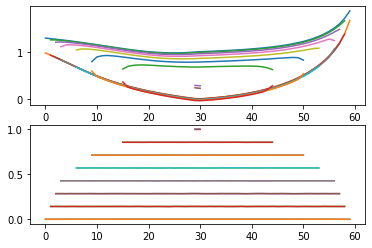

In [99]:

f, (ax1, ax2) = plt.subplots(2, 1)
n_points = 60
for p in np.linspace(0, 1, 8):
    points = []

    for k in np.linspace(0, 1, n_points):
        pts = board.get_cut(k).get(p)
        if pts:
            points.append(pts)

    points = np.array(points)
    pad = (n_points - len(points))//2
    ax1.plot(np.pad(points[:, 0, 1], (pad, pad), 'constant', constant_values=(np.nan, np.nan)))
    ax1.plot(np.pad(points[:, 1, 1], (pad, pad), 'constant', constant_values=(np.nan, np.nan)))
    ax2.plot(np.pad(points[:, 0, 0], (pad, pad), 'constant', constant_values=(np.nan, np.nan)))
    ax2.plot(np.pad(points[:, 1, 0], (pad, pad), 'constant', constant_values=(np.nan, np.nan)))
plt.show()